# Mandatory Assignment 2: Machine Learning - Ruter Passenger Prediction

We have selected logistic regression for classification because high/Low ridership is simpler and more practical than exact passenger numbers, and logistic regression provides clear accuracy scores and confusion matrices. 

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Ruter dataset
df = pd.read_csv('Ruter-data.csv', sep=';')
print(f"Dataset shape: {df.shape}")

# Look at the first few rows
df.head()

Dataset shape: (6000, 17)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [ ]:
# Data preparation - Filter to bus line 150
df = df[df['Linjenavn'] == '150'].copy()
print(f"After filtering to line 150: {df.shape}")

# Convert date column
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')

# Create simple features from date
df['weekday'] = df['Dato'].dt.weekday  # 0=Monday, 6=Sunday
df['month'] = df['Dato'].dt.month

# Create binary target: High ridership (1) or Low ridership (0)
# Using median as threshold
median_passengers = df['Passasjerer_Ombord'].median()
df['high_ridership'] = (df['Passasjerer_Ombord'] > median_passengers).astype(int)

print(f"Median passenger count: {median_passengers}")
print(f"High ridership distribution:")
print(df['high_ridership'].value_counts())

After filtering to line 150: (110, 17)
Median passenger count: 2.0
High ridership distribution:
high_ridership
0    56
1    54
Name: count, dtype: int64


In [ ]:
# Train logistic regression model

# Define features and target
X = df[['weekday', 'month']]  # Simple features
y = df['high_ridership']      # Binary target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

Accuracy Score: 0.364

Confusion Matrix:
[[ 8  0]
 [14  0]]


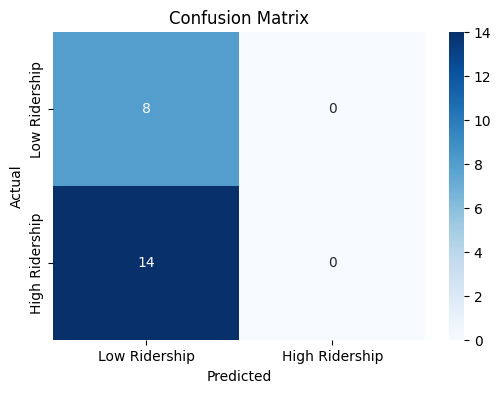


Prediction for 2020-08-15: Low
Prediction for 2020-12-24: High


c:\Users\sunns\OneDrive\Dokumenter vgs\GitHub\Dave3625-Host-2025\Lab0\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\sunns\OneDrive\Dokumenter vgs\GitHub\Dave3625-Host-2025\Lab0\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Visualize confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Ridership', 'High Ridership'], 
            yticklabels=['Low Ridership', 'High Ridership'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Prediction function
def predict_ridership(date_str):
    """
    Predict ridership level for a specific date
    Input: Date string in format 'YYYY-MM-DD'
    Output: 'High' or 'Low' ridership prediction
    """
    date = pd.to_datetime(date_str)
    weekday = date.weekday()
    month = date.month
    
    prediction = model.predict([[weekday, month]])[0]
    return 'High' if prediction == 1 else 'Low'

# Test prediction
print(f"\nPrediction for 2020-08-15: {predict_ridership('2020-08-15')}")
print(f"Prediction for 2020-12-24: {predict_ridership('2020-12-24')}")